<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="10%" align="left" border="0">

# Financial Time Series(金融时间序列)
关于matplotlib可参考<https://github.com/SynMind/MyStudy/blob/master/matplotlib/matplotlib.md>

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### DataFrame Class

```python
Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous(由很多种类组成的) tabular(表格式的) data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure

Parameters
----------
data : numpy ndarray (structured or homogeneous), dict, or DataFrame

    Dict can contain Series, arrays, constants, or list-like objects
    
    
index(pandas Index类的实例) : Index or array-like(类似数组：和ndarray对象类似的数据结构，如列表对象)

    Index to use for resulting frame. Will default to `np.arange(n)` if
    no indexing information part of input data and no index provided
    
    
columns : Index or array-like

    Column labels to use for resulting frame. Will default to
    np.arange(n) if no column labels are provided
    
    
dtype : dtype, default None

    Data type to force, otherwise infer(使用/强制的数据类型；否则通过推导得出)
    
    
copy : boolean, default False

    Copy data from inputs. Only affects DataFrame / 2d ndarray input

Examples
--------
>>> d = {'col1': ts1, 'col2': ts2}
>>> df = DataFrame(data=d, index=index)
>>> df2 = DataFrame(np.random.randn(10, 5))
>>> df3 = DataFrame(np.random.randn(10, 5),
...                 columns=['a', 'b', 'c', 'd', 'e'])

See also
--------
DataFrame.from_records : constructor from tuples, also record arrays
DataFrame.from_dict : from dicts of Series, arrays, or dicts
DataFrame.from_items : from sequence of (key, value) pairs
pandas.read_csv, pandas.read_table, pandas.read_clipboard
Type:           type
```

In [4]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [7]:
df.index  # the index(索引) values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
df.columns  # the column names(标签)

Index(['numbers'], dtype='object')

In [9]:
df.ix['c']  # selection via index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


numbers    30
Name: c, dtype: int64

In [10]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [14]:
df.loc[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [15]:
df.loc[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [16]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [17]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


一般地，可在DataFrame对象上进行和NumPy ndarray对象相同的向量化操作：

In [18]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


在两个维度上同时扩增DataFrame对象：

In [19]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [20]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

取整个DataFrame对象来定义新列(此时，索引自动分配)

In [21]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [22]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [23]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


### 处理缺漏信息

In [24]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


pandas默认只接受索引已经存在的值，我们丢失了索引为y的值，而在z处看到的是`NaN`值。为了保留这两个索引，我们可以提供一个附加参数，告诉pandas如何连接。      
`how='outer'`表示使用两个索引中所有值的并集：

In [25]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


连接操作还有其他选项：      
1. `inner`: 索引的交集
2. `left`: 默认值，使用调用方法的对象中的索引值
3. `right`: 使用被连接对象的索引值

尽管有缺失值，但是大部分方法调用仍然有效：

In [26]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [27]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### 处理数值数据

In [28]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-0.490602, -0.448438,  0.507652,  0.6264  ],
       [ 0.582841,  1.479433,  0.856295,  0.852351],
       [ 0.526829,  0.922253,  1.172447,  0.279974],
       [ 0.449499,  0.438187, -0.225605, -0.379799],
       [ 0.41354 , -0.774152, -0.031514,  0.138357],
       [-0.224221, -2.300392,  0.331845,  0.644584],
       [ 0.234905, -0.042174,  0.01418 , -0.58701 ],
       [-1.484347,  0.299754,  0.218424, -1.908893],
       [ 0.649886, -0.05822 , -0.453574, -1.189051]])

In [29]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.490602,-0.448438,0.507652,0.626400
1,0.582841,1.479433,0.856295,0.852351
2,0.526829,0.922253,1.172447,0.279974
3,0.449499,0.438187,-0.225605,-0.379799
4,0.413540,-0.774152,-0.031514,0.138357
5,-0.224221,-2.300392,0.331845,0.644584
6,0.234905,-0.042174,0.014180,-0.587010
7,-1.484347,0.299754,0.218424,-1.908893
8,0.649886,-0.058220,-0.453574,-1.189051


和结构数组一样，DataFrame对象可通过一个具有合适数量元素的列表，直接定义列名；      
可以随时定义/更改DataFrame对象的属性：

In [30]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-0.490602,-0.448438,0.507652,0.626400
1,0.582841,1.479433,0.856295,0.852351
2,0.526829,0.922253,1.172447,0.279974
3,0.449499,0.438187,-0.225605,-0.379799
4,0.413540,-0.774152,-0.031514,0.138357
5,-0.224221,-2.300392,0.331845,0.644584
6,0.234905,-0.042174,0.014180,-0.587010
7,-1.484347,0.299754,0.218424,-1.908893
8,0.649886,-0.058220,-0.453574,-1.189051


列名提供访问DataFrame对象中数据的高效机制，同样和结构数组类似：

In [31]:
df['No2'][3]  # value in column No2 at index position 3

0.4381869873129014

使用`date_range`生成一个DatetimeIndex对象：

In [32]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

```python
Signature: pd.date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)
Docstring:
Return a fixed frequency datetime index, with day (calendar) as the default
frequency

Parameters
----------
start : string or datetime-like, default None
    Left bound for generating dates(生成日期的左界)
end : string or datetime-like, default None
    Right bound for generating dates(生成日期的右界)
periods : integer or None, default None
    If None, must specify start and end
freq : string or DateOffset(日期偏移), default 'D' (calendar daily)
    Frequency strings(频率字符串) can have multiples, e.g. '5H'
tz : string or None
    Time zone name for returning localized DatetimeIndex(本地化索引的时区名称), for example
    Asia/Hong_Kong
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range(将start和end规范化为午夜)
name : str, default None
    Name of the resulting index(结果索引的名称)
closed : string or None, default None
    Make the interval closed with respect to the given frequency to
    the 'left', 'right', or both sides (None)

Notes
-----
2 of start, end, or periods must be specified

To learn more about the frequency strings, please see `this link
<http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases>`__.

Returns
-------
rng : DatetimeIndex
Type:      function
```

和列一样，我们将新生成的DatetimeIndex作为新的Index对象，赋给DataFrame对象：

In [36]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.490602,-0.448438,0.507652,0.626400
2015-02-28,0.582841,1.479433,0.856295,0.852351
2015-03-31,0.526829,0.922253,1.172447,0.279974
2015-04-30,0.449499,0.438187,-0.225605,-0.379799
2015-05-31,0.413540,-0.774152,-0.031514,0.138357
2015-06-30,-0.224221,-2.300392,0.331845,0.644584
2015-07-31,0.234905,-0.042174,0.014180,-0.587010
2015-08-31,-1.484347,0.299754,0.218424,-1.908893
2015-09-30,0.649886,-0.058220,-0.453574,-1.189051


##### pd.date_range函数频率freq值

|别名|描述|
|:-|:-|
|`B`|交易日|
|`C`|自定义交易日(实验性)|
|`D`|日历日|
|`W`|每周|
|`M`|每月底|
|`BM`|每月最后一个交易日|
|`MS`|月初|
|`BMS`|每月第一个交易日|
|`Q`|季度末|
|`BQ`|每季度最后一个交易日|
|`QS`|季度初|
|`BQS`|每季度第一个交易日|
|`A`|每年底|
|`BA`|每月最后一个交易日|
|`AS`|每年初|
|`BAS`|每年第一个交易日|
|`H`|每小时|
|`T`|每分钟|
|`S`|每秒|
|`L`|毫秒|
|`U`|微秒|

也可以使用NumPy的array函数从DataFrame生成一个ndarray

In [44]:
np.array(df).round(6)

array([[-0.490602, -0.448438,  0.507652,  0.6264  ],
       [ 0.582841,  1.479433,  0.856295,  0.852351],
       [ 0.526829,  0.922253,  1.172447,  0.279974],
       [ 0.449499,  0.438187, -0.225605, -0.379799],
       [ 0.41354 , -0.774152, -0.031514,  0.138357],
       [-0.224221, -2.300392,  0.331845,  0.644584],
       [ 0.234905, -0.042174,  0.01418 , -0.58701 ],
       [-1.484347,  0.299754,  0.218424, -1.908893],
       [ 0.649886, -0.05822 , -0.453574, -1.189051]])

## 基本分析

In [45]:
df.sum()

No1    0.658331
No2   -0.483749
No3    2.390150
No4   -1.523088
dtype: float64

In [46]:
df.mean()

No1    0.073148
No2   -0.053750
No3    0.265572
No4   -0.169232
dtype: float64

In [47]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-0.490602,-0.448438,0.507652,0.626400
2015-02-28,0.092240,1.030994,1.363946,1.478751
2015-03-31,0.619069,1.953248,2.536393,1.758725
2015-04-30,1.068567,2.391435,2.310789,1.378926
2015-05-31,1.482108,1.617282,2.279274,1.517283
2015-06-30,1.257887,-0.683110,2.611120,2.161866
2015-07-31,1.492792,-0.725284,2.625300,1.574856
2015-08-31,0.008445,-0.425530,2.843724,-0.334037
2015-09-30,0.658331,-0.483749,2.390150,-1.523088


获取数据集统计数字的捷径：

In [48]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.073148,-0.053750,0.265572,-0.169232
std,0.699459,1.083542,0.517986,0.930100
min,-1.484347,-2.300392,-0.453574,-1.908893
25%,-0.224221,-0.448438,-0.031514,-0.587010
50%,0.413540,-0.042174,0.218424,0.138357
75%,0.526829,0.438187,0.507652,0.626400
max,0.649886,1.479433,1.172447,0.852351


也可以对DataFrame对象应用大部分NumPy通用函数：

In [49]:
np.sqrt(df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


,No1,No2,No3,No4
2015-01-31,NaN,NaN,0.712497,0.791454
2015-02-28,0.763440,1.216319,0.925362,0.923228
2015-03-31,0.725830,0.960340,1.082796,0.529126
2015-04-30,0.670447,0.661957,NaN,NaN
2015-05-31,0.643071,NaN,NaN,0.371963
2015-06-30,NaN,NaN,0.576060,0.802860
2015-07-31,0.484670,NaN,0.119082,NaN
2015-08-31,NaN,0.547498,0.467359,NaN
2015-09-30,0.806155,NaN,NaN,NaN


一般地，在**NumPy通用函数**适用于ndarray对象的任何情况下，都可将这些函数应用到包含相同数据的**pandas DataFrame**对象。

pandas有相当强的容错能力，它可以捕捉错误，在对应数学运算失败时放入NaN值。并且还可以将不完整的数据集当成完整数据集来使用：

In [50]:
np.sqrt(df).sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


No1    4.093614
No2    3.386115
No3    3.883155
No4    3.418632
dtype: float64

在这些情况下，pandas将不考虑NaN值，只使用其他可用值。   
一般情况下，绘制数据图表也只需一行代码：

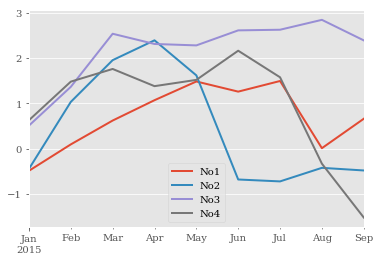

In [51]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

本质上，pandas提供matplotlib的一个封装器，专门为DataFrame对象所设计。下面是plot方法的参数：

```python
df.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
Type:           FramePlotMethods
Docstring:     
DataFrame plotting accessor and method

Examples
--------
>>> df.plot.line()
>>> df.plot.scatter('x', 'y')
>>> df.plot.hexbin()

These plotting methods can also be accessed by calling the accessor as a
method with the ``kind`` argument:
``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
Call docstring:
Make plots of DataFrame using matplotlib / pylab.

*New in version 0.17.0:* Each plot kind has a corresponding method on the
``DataFrame.plot`` accessor:
``df.plot(kind='line')`` is equivalent to
``df.plot.line()``.

Parameters
----------
data : DataFrame
x : label or position, default None (只在列值为x刻度时使用)
y : label or position, default None (只在列值为x刻度时使用)
    Allows plotting of one column versus another
kind : str   (图表类型)
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot
ax : matplotlib axes object, default None (绘图使用的matplotlib轴对象)
subplots : boolean, default False
    Make separate subplots for each column(子图中的绘图列)
sharex : boolean, default True if ax is None else False (共用x轴)
    In case subplots=True, share x axis and set some x axis labels to
    invisible; defaults to True if ax is None otherwise False if an ax
    is passed in; Be aware, that passing in both an ax and sharex=True
    will alter all x axis labels for all axis in a figure!
sharey : boolean, default False  (共用y轴)
    In case subplots=True, share y axis and set some y axis labels to
    invisible
layout : tuple (optional)
    (rows, columns) for the layout of subplots
figsize : a tuple (width, height) in inches
use_index : boolean, default True
    Use index as ticks for x axis (使用DataFrame.index作为x轴刻度)
title : string or list
    Title to use for the plot(图表标题). If a string is passed, print the string at
    the top of the figure. If a list is passed and `subplots` is True,
    print each item in the list above the corresponding subplot.
grid : boolean, default None (matlab style default)
    Axis grid lines (水平和垂直网格线)
legend : False/True/'reverse'
    Place legend on axis subplots  (标签图例)
style : list or dict
    matplotlib line style per column (绘图线形，每列)
logx : boolean, default False
    Use log scaling on x axis (x轴的对数刻度)
logy : boolean, default False  (y轴的对数刻度)
    Use log scaling on y axis
loglog : boolean, default False
    Use log scaling on both x and y axes
xticks : sequence (默认Index)
    Values to use for the xticks (x轴的刻度)
yticks : sequence (默认Values)
    Values to use for the yticks(y轴刻度)
xlim : 2-tuple/list  (x轴的界限)
ylim : 2-tuple/list  (y轴的界限)
rot : int, default None
    Rotation for ticks (xticks for vertical, yticks for horizontal plots)  (旋转x轴刻度)
fontsize : int, default None
    Font size for xticks and yticks
colormap : str or matplotlib colormap object, default None
    Colormap to select colors from. If string, load colormap with that name
    from matplotlib.   (用于绘图的颜色映射)
colorbar : boolean, optional
    If True, plot colorbar (only relevant for 'scatter' and 'hexbin' plots)
position : float
    Specify relative alignments for bar plot layout.
    From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)
layout : tuple (optional)
    (rows, columns) for the layout of the plot
table : boolean, Series or DataFrame, default False
    If True, draw a table using the data in the DataFrame and the data will
    be transposed to meet matplotlib's default layout.
    If a Series or DataFrame is passed, use passed data to draw a table.
yerr : DataFrame, Series, array-like, dict and str
    See :ref:`Plotting with Error Bars <visualization.errorbars>` for
    detail.
xerr : same types as yerr.
stacked : boolean, default False in line and
    bar plots, and True in area plot. If True, create stacked plot.(堆叠，只用于柱状图)
sort_columns : boolean, default False
    Sort column names to determine plot ordering (在绘图之前，将列按字母顺序排列)
secondary_y : boolean or sequence, default False
    Whether to plot on the secondary y-axis  (第二个y轴)
    If a list/tuple, which columns to plot on secondary y-axis
mark_right : boolean, default True   (第二个y轴，自动设置标签)
    When using a secondary_y axis, automatically mark the column
    labels with "(right)" in the legend
kwds : keywords
    Options to pass to matplotlib plotting method (传递给matplotlib选项)

Returns
-------
axes : matplotlib.AxesSubplot or np.array of them

Notes
-----

- See matplotlib documentation online for more on this subject
- If `kind` = 'bar' or 'barh', you can specify relative alignments
  for bar plot layout by `position` keyword.
  From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)
- If `kind` = 'scatter' and the argument `c` is the name of a dataframe
  column, the values of that column are used to color each point.
- If `kind` = 'hexbin', you can control the size of the bins with the
  `gridsize` argument. By default, a histogram of the counts around each
  `(x, y)` point is computed. You can specify alternative aggregations
  by passing values to the `C` and `reduce_C_function` arguments.
  `C` specifies the value at each `(x, y)` point and `reduce_C_function`
  is a function of one argument that reduces all the values in a bin to
  a single number (e.g. `mean`, `max`, `sum`, `std`).
```

# Series 类

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df['No1']

2015-01-31   -0.490602
2015-02-28    0.582841
2015-03-31    0.526829
2015-04-30    0.449499
2015-05-31    0.413540
2015-06-30   -0.224221
2015-07-31    0.234905
2015-08-31   -1.484347
2015-09-30    0.649886
Freq: M, Name: No1, dtype: float64

In [58]:
type(df['No1'])

pandas.core.series.Series

DataFrame的主要方法也可用于Series对象：

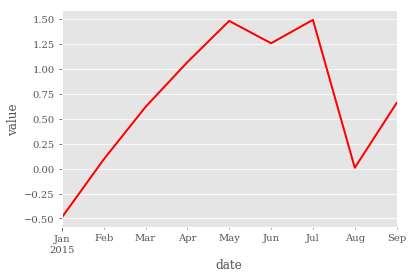

In [60]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

# GroupBy Operations

pandas具备强大而灵活的分组功能，工作方式类似于SQL中的分组和Microsoft Excel中的透视表。为了进行分组，我们添加一列，表示对应索引数据所属的季度：

In [61]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.490602,-0.448438,0.507652,0.626400,Q1
2015-02-28,0.582841,1.479433,0.856295,0.852351,Q1
2015-03-31,0.526829,0.922253,1.172447,0.279974,Q1
2015-04-30,0.449499,0.438187,-0.225605,-0.379799,Q2
2015-05-31,0.413540,-0.774152,-0.031514,0.138357,Q2
2015-06-30,-0.224221,-2.300392,0.331845,0.644584,Q2
2015-07-31,0.234905,-0.042174,0.014180,-0.587010,Q3
2015-08-31,-1.484347,0.299754,0.218424,-1.908893,Q3
2015-09-30,0.649886,-0.058220,-0.453574,-1.189051,Q3


现在，我们可以根据“Quarter”列分组，输出单独组的统计数字：

In [62]:
groups = df.groupby('Quarter')

In [63]:
groups.mean()  # 每组的平均值

,No1,No2,No3,No4
Quarter,,,,
Q1,0.206356,0.651083,0.845464,0.586242
Q2,0.212939,-0.878786,0.024909,0.134381
Q3,-0.199852,0.066453,-0.073657,-1.228318


In [64]:
groups.max()  # 每组的最大值

,No1,No2,No3,No4
Quarter,,,,
Q1,0.582841,1.479433,1.172447,0.852351
Q2,0.449499,0.438187,0.331845,0.644584
Q3,0.649886,0.299754,0.218424,-0.587010


In [65]:
groups.size()  # 组的大小

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

分组可在多列上进行，我们添加一列，表示索引月份是奇数还是偶数：

In [66]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [67]:
groups = df.groupby(['Quarter','Odd_Even'])

In [68]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [69]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.582841  1.479433  0.856295  0.852351
        Odd       0.018114  0.236907  0.840049  0.453187
Q2      Even      0.112639 -0.931103  0.053120  0.132393
        Odd       0.413540 -0.774152 -0.031514  0.138357
Q3      Even     -1.484347  0.299754  0.218424 -1.908893
        Odd       0.442396 -0.050197 -0.219697 -0.888031

## Financial Data

In [4]:
from pandas_datareader import data as web

pandas内建函数`DataReader`从Web读取数据，进行数据分析(DAX)

In [6]:
DAX = web.DataReader(name='SPY', data_source='google',
                     start='2000-1-1')   
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2001-10-15 to 2017-09-08
Data columns (total 5 columns):
Open      3980 non-null float64
High      3980 non-null float64
Low       3980 non-null float64
Close     4000 non-null float64
Volume    4000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 187.5 KB


```json
Signature: web.DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.001, session=None, access_key=None)
Docstring:
Imports data from a number of online sources.

Currently supports Yahoo! Finance, Google Finance, St. Louis FED (FRED),
Kenneth French's data library, and the SEC's EDGAR Index.

Parameters
----------
name : str or list of strs
    the name of the dataset. Some data sources (yahoo, google, fred) will
    accept a list of names.
data_source: {str, None}
    the data source ("yahoo", "yahoo-actions", "yahoo-dividends",
    "google", "fred", "ff", or "edgar-index")
start : {datetime, None}
    left boundary for range (defaults to 1/1/2010)
end : {datetime, None}
    right boundary for range (defaults to today)
retry_count : {int, 3}
    Number of times to retry query request.
pause : {numeric, 0.001}
    Time, in seconds, to pause between consecutive queries of chunks. If
    single value given for symbol, represents the pause between retries.
session : Session, default None
        requests.sessions.Session instance to be used

Examples
----------

# Data from Yahoo! Finance
gs = DataReader("GS", "yahoo")

# Corporate Actions (Dividend and Split Data)
# with ex-dates from Yahoo! Finance
gs = DataReader("GS", "yahoo-actions")

# Data from Google Finance
aapl = DataReader("AAPL", "google")

# Data from FRED
vix = DataReader("VIXCLS", "fred")

# Data from Fama/French
ff = DataReader("F-F_Research_Data_Factors", "famafrench")
ff = DataReader("F-F_Research_Data_Factors_weekly", "famafrench")
ff = DataReader("6_Portfolios_2x3", "famafrench")
ff = DataReader("F-F_ST_Reversal_Factor", "famafrench")

# Data from EDGAR index
ed = DataReader("full", "edgar-index")
ed2 = DataReader("daily", "edgar-index")
Type:      function
```

In [72]:
DAX.tail()  # tail方法提供数据集的最后5行

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-30,244.83,246.32,244.62,246.01,62030805
2017-08-31,246.72,247.77,246.05,247.49,103803880
2017-09-01,247.92,248.33,247.67,247.84,62006989
2017-09-05,247.26,247.52,244.95,246.06,91398777
2017-09-08,246.54,247.11,246.30,246.58,63832825


为了更好的概览指数的历史，可再次使用plot方法生成一个图表：

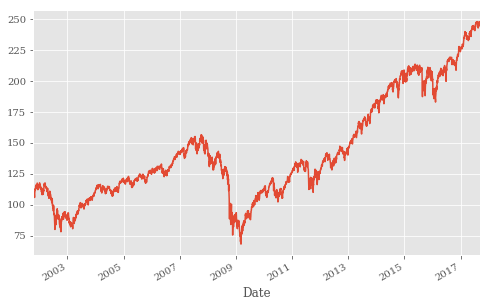

In [75]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

和NumPy ndarray类似，pandas允许在整个甚至复杂的DataFame对象上进行向量化数学运算：

In [ ]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] /
                                DAX['Close'][i - 1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
DAX[['Close', 'Ret_Loop']].tail()

shift 方法实现向量化：   
它相对于索引向前或向后移动Series或者整个DataFame对象。

In [7]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

Wall time: 65.2 ms


In [ ]:
del DAX['Ret_Loop'] 

In [10]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBDF69A58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBDFF9CC0>], dtype=object)

移动平均值(即趋势)使用`rolling_mean`函数计算：

In [11]:
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()

In [12]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-08-30,246.01,245.308571,231.418810
2017-08-31,247.49,245.434286,231.538294
2017-09-01,247.84,245.555000,231.659127
2017-09-05,246.06,245.686190,231.769008
2017-09-08,246.58,245.792619,231.878333


In [13]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [14]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * math.sqrt(252)
  # moving annual volatility

In [15]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBE1C3A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBE1049E8>], dtype=object)

**波动率聚集**：    
    波动率不是长期恒定的；既有高波动率时期(正收益和负收益都很高),也有低波动率时期
    
**杠杆效应**：   
    一般地，波动性和股票市场收益是负相关的；当市场下跌时波动性升高，反之亦然。

## Regression Analysis  

线性最小二乘回归(OLS)

In [17]:
import pandas as pd
from urllib import request

In [26]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
request.urlretrieve(es_url, './data/es.txt')
request.urlretrieve(vs_url, './data/vs.txt')

URLError: <urlopen error [WinError 10061] 由于目标计算机积极拒绝，无法连接。>